<a href="https://colab.research.google.com/github/Maitreyeej/Food_Sales_Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive        #Mounting the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/CODING_DOJO/WEEK2/sales_predictions.csv'
sales_prediction_df=pd.read_csv(filename)         #importing and reading the data into panda dataframe
sales_prediction_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [83]:
sales_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


***To clean the data, we will check for any duplicates and also the missing data in a data frame. We will delete the duplicated data. We will also check for unit consistencies. We will either eliminate or fill in the missing data.***

***Cleaning up data which can be used is essential to get good results.***

In [84]:
sales_prediction_df.shape

(8523, 12)

***Two columns have missing values.***

***Column Names: Item_Weight, Outlet_Size***


In [85]:
sales_prediction_df.isna().sum()        #getting the sum of the missing values in each column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
                             ... 
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Length: 12, dtype: int64

In [86]:
sales_prediction_df.duplicated().any()        #checking if there are any duplicated data

False

***This shows us that there are inconsistencies in the data in the column "Item_Fat_Content". Low Fat is entered as Low Fat and also as LF, low Fat. Regular is entered as Regular and also reg. We will need to be careful while dealing with this data.***

In [87]:
sales_prediction_df['Item_Weight'].value_counts()    #calculating most occured value in Item Weights column

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [88]:
sales_prediction_df['Outlet_Size'].value_counts()       #calculating most occured value in Outlet Size column

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [89]:
sales_prediction_df['Item_Weight'].min()          #getting the minimum of the Item Weight

4.555

In [90]:
sales_prediction_df['Item_Weight'].max()        #getting the maximum of the Item Weight

21.35

In [91]:
Weight_mean=sales_prediction_df['Item_Weight'].mean()         #calculating the mean of Item Weight column
print(Weight_mean)

12.857645184136183


In [92]:
pd.set_option('display.max_rows', 10)
sales_prediction_df.groupby(['Item_Weight',  'Outlet_Size'])[['Outlet_Size']].count()         #checking if the grouping by Item Weight and Outlet Size 

Outlet_Size
Item_Weight Outlet_Size             
4.555       High                   1
            Medium                 1
            Small                  2
4.590       High                   1
            Medium                 1
...                              ...
21.250      Medium                 7
            Small                  5
21.350      High                   1
            Medium                 2
            Small                  2

[1082 rows x 1 columns]

In [93]:
sales_prediction_temp_df=sales_prediction_df.loc[(sales_prediction_df['Item_Weight']>12) & (sales_prediction_df['Item_Weight']<13)]  
sales_prediction_temp_df.groupby(['Item_Weight',  'Outlet_Size'])[['Outlet_Size']].count()  #checking the Outlet Size for the Item Weight between 12 and 13

Outlet_Size
Item_Weight Outlet_Size             
12.10       High                   6
            Medium                17
            Small                 12
12.15       High                  11
            Medium                26
...                              ...
12.80       Medium                 7
            Small                  6
12.85       High                   7
            Medium                16
            Small                 12

[27 rows x 1 columns]

In [94]:
Weight_missing=sales_prediction_df['Item_Weight'].isna()          #checking if the data missing is for the overlapping data points or different data points
Outlet_missing=sales_prediction_df['Outlet_Size'].isna()
sales_prediction_df.loc[(Weight_missing & Outlet_missing),('Item_Weight', 'Outlet_Size')]

,Item_Weight,Outlet_Size


***Since there are no overlapping missing values, if we decide to eliminate the values, we will end up missing total of 3873 values which is about 45% of the data. So eliminating the data is not an option.***

In [95]:
sales_prediction_df['Item_Weight'].fillna(Weight_mean, inplace=True)   #Filling in the data in 'Item_Weight' Column by the way of filling in the mean value of the column

***'Item_Weight' column is filled in by the mean value of the column. Mean value is around 12.85. Mode / most occured value of the column is also 12.15. This value is close to the value of mean as well.***

In [96]:
sales_prediction_df.info()        #verifying that the missing values in column 'Item_Weight' are filled 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [97]:
sales_prediction_df['Outlet_Size'].fillna('Medium', inplace=True)  
#Filling in the missing values in Outlet Size as the most occured value in the range of 12 to 13 Item Weight

***Based on the grouped analysis as per the Item Weight between 12 and 13. As the most occured values are around 12 and 13, Outlet Size estimation is based on the grouped analysis. As most occured Outlet Size value is medium, missing field is filled with that value.***

In [98]:
sales_prediction_df.info()        #making sure there are no missing values anymore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


***OBSERVATIONS***

***1. Data types for all the columns seems to be correct.***

***2.Missing Values only in 2 columns.***

***3.This data is from between the year 1985 and 2009.***

In [ ]:
#verifying for the irregularities for all the columns

In [99]:
sales_prediction_df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDW26     9
NCL31     9
FDW49     9
         ..
FDC23     1
FDN52     1
FDY43     1
FDE52     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [100]:
sales_prediction_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [101]:
sales_prediction_df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [102]:
sales_prediction_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [103]:
sales_prediction_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [104]:
sales_prediction_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

***This shows us that there are inconsistencies in the data in the column "Item_Fat_Content". Low Fat is entered as Low Fat and also as LF, low Fat. Regular is entered as Regular and also reg. We will need to be careful while dealing with this data.***

In [105]:
#Fixing the irregularities in the column of 'Item_Fat_Content'
sales_prediction_df=sales_prediction_df.replace({'Item_Fat_Content' : { 'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}})   
sales_prediction_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [106]:
sales_prediction_df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [107]:
sales_prediction_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [157]:
sales_prediction_df_TotalSales=sales_prediction_df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()       #plotting for sales in the years of establishment

In [177]:
X1_sales=sales_prediction_df_TotalSales.index
Y1_sales=sales_prediction_df_TotalSales.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


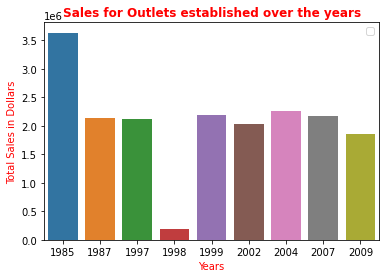

In [176]:
sns.barplot(X1_sales, Y1_sales)
plt.title('Sales for Outlets established over the years', fontweight='bold', c='red')
plt.ylabel('Total Sales in Dollars', c='red')
plt.xlabel('Years', c='red');


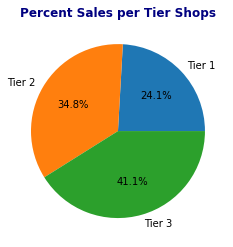

In [138]:
sales_prediction_df_tier=sales_prediction_df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()     #Plotting a pie chart with the share of sales as per the location
Pie_Tier=sales_prediction_df_tier.values
Pie_Tier_Lable= sales_prediction_df_tier.index
temp=Pie_Tier.sum()

for ele in Pie_Tier:
   ele=ele/temp*100

plt.title('Percent Sales per Tier Shops', c='navy', fontweight='bold')
plt.pie(Pie_Tier, autopct='%1.1f%%', labels= Pie_Tier_Lable );

In [161]:
sales_prediction_df_outlets=sales_prediction_df.groupby(['Outlet_Establishment_Year']) ['Outlet_Identifier'].count()      #Plot for no. of outlets established over the years

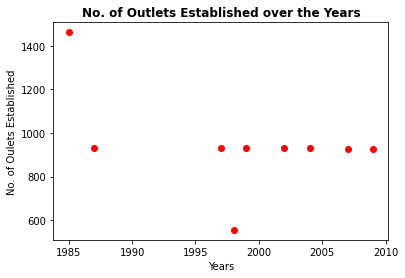

In [149]:
outlets_X=sales_prediction_df_outlets.index
outlets_Y=sales_prediction_df_outlets.values
plt.title('No. of Outlets Established over the Years', fontweight='bold')
plt.xlabel('Years')
plt.ylabel('No. of Oulets Established')
plt.scatter(outlets_X, outlets_Y, c='red');

***Number of outlets established seems to have plateued at around 930. A sudden dip in number of outlets was seen in the year 1998 to 555.***

In [166]:
sales_prediction_df_outletSize=sales_prediction_df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()        #Plotting for the sales as per the outlet size

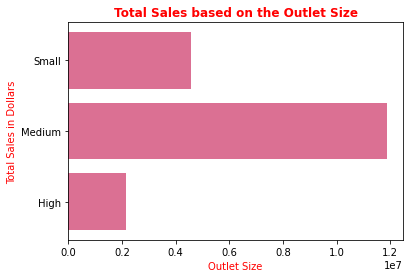

In [178]:
sales_prediction_df_outletSize
plt.barh(sales_prediction_df_outletSize.index, sales_prediction_df_outletSize.values, color='palevioletred')
plt.title('Total Sales based on the Outlet Size', fontweight='bold', c='red')
plt.ylabel('Total Sales in Dollars', c='red')
plt.xlabel('Outlet Size', c='red');

Text(0.5, 0, 'Fat Content')

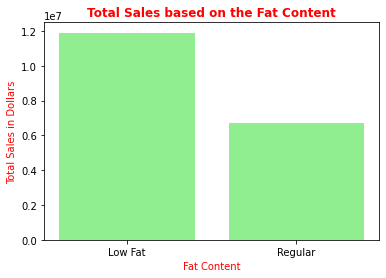

In [175]:
sales_prediction_df_fat=sales_prediction_df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()        #plotting for sales based on the fat content in food items
sales_prediction_df_fat
plt.bar(sales_prediction_df_fat.index, sales_prediction_df_fat.values, color='lightgreen')
plt.title('Total Sales based on the Fat Content', fontweight='bold', c='red')
plt.ylabel('Total Sales in Dollars', c='red')
plt.xlabel('Fat Content', c='red')